# Optimización II
## Exámen de Prácticas 

### Ejercicio 1

In [1]:
import numpy as np

# 1) Introducimos la matriz R
R = np.array([[5, 0, 3, 0],
             [0, 4, 0, 2],
             [3, 0, 4, 0]
            ], dtype=np.float64)

# Definimos la dimensión latente
k = 2

# Fijamos la semilla
np.random.seed(42)

U_0 = np.random.rand(3, 2)
V_0 = np.random.rand(4, 2)

print(f"R = \n{R}")
print(f"k = {k}")
print(f"U_0 = \n{U_0}")
print(f"V_0 = \n{V_0}")


R = 
[[5. 0. 3. 0.]
 [0. 4. 0. 2.]
 [3. 0. 4. 0.]]
k = 2
U_0 = 
[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]]
V_0 = 
[[0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]]


### Ejercicio 2

In [2]:
def mse_error(R, U, V, lambda_reg):
    # Inicializamos el error
    error = 0

    # Calculamos el término de error cuadrático medio
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if R[i, j] > 0:
                error += (R[i,j] - np.dot(U[i, :], V[j, :].T)) ** 2
    
    # Añadimos el "λ_reg"
    error += lambda_reg * (np.linalg.norm(U)**2 + np.linalg.norm(V)**2)

    return error

error = mse_error(R, U_0, V_0, lambda_reg=0.1)
print(f"MSE(R, U_0, V_0, lambda_reg) = {error}")

MSE(R, U_0, V_0, lambda_reg) = 56.45103205815544


### Ejercicio 3

In [3]:
def gradiente(R, U, V, alpha, lambda_reg, num_iteraciones):
    valores_mse = []
    for iter in range(num_iteraciones):
        # Calcula los gradientes
        U_grad = np.zeros(U.shape)
        V_grad = np.zeros(V.shape)

        for i in range(R.shape[0]):
            for j in range(R.shape[1]):
                if R[i,j] > 0:
                    error_ij = R[i,j] - np.dot(U[i, :], V[j, :].T)
                    U_grad[i, :] += -2 * error_ij * V[j, :] + 2 * lambda_reg * U[i, :]
                    V_grad[j, :] += -2 * error_ij * U[i, :] + 2 * lambda_reg * V[j, :]               
        
        # Actualizar U y V
        U -= alpha * U_grad
        V -= alpha * V_grad

        # Calcula los valores del MSE y los guarda
        mse = mse_error(R, U, V, lambda_reg)
        valores_mse.append(mse)

    R_predict = np.dot(U, V.T)
    return U, V, valores_mse, R_predict


### Ejercicio 4

In [4]:
U_opt, V_opt, valores_mse, R_predict = gradiente(R, U_0, V_0, alpha=0.05, lambda_reg=0.1, num_iteraciones=100)
print(f"R_predict = \n{R_predict}")

R_predict = 
[[4.80000002 4.58616128 3.         2.17537824]
 [3.65821504 3.87268796 1.48791856 1.93637761]
 [3.         1.95637763 3.80000002 0.688278  ]]


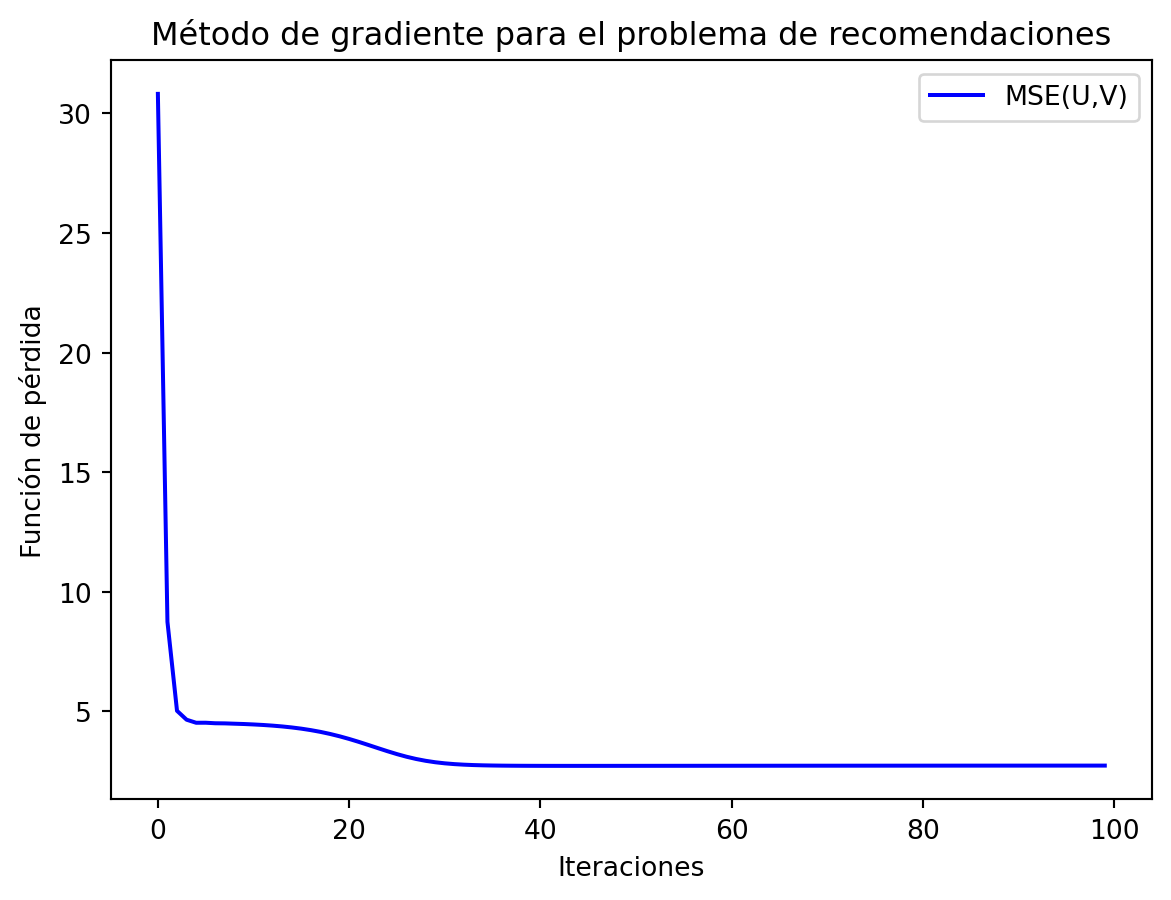

In [5]:
import matplotlib.pyplot as plt
# Defino el número de iteraciones porque antes simplemente lo he hecho en la propia función
num_iteraciones = 100

plt.figure()
plt.plot(range(num_iteraciones), valores_mse, color="blue", label="MSE(U,V)")
plt.xlabel("Iteraciones")
plt.ylabel("Función de pérdida")
plt.title("Método de gradiente para el problema de recomendaciones")
plt.legend()
plt.show()